In [ ]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24787 sha256=6738903d6a809961315882fbe7cf66e3067fe7509b6bc4e491321f4fb168dd95
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx     #import all the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import nltk, re, pprint
#nltk.download('stopwords')
from wordcloud import WordCloud #the package should be installed before
from PIL import Image
import pickle
from fa2 import ForceAtlas2  #the package should be installed before
import community as cmg #the package should be installed before
from collections import Counter 
import collections
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import io
import pandas as pd
import os
import glob
import powerlaw
import matplotlib
import json
from networkx.readwrite import json_graph

%matplotlib inline

In [ ]:
GN = nx.read_gml("/content/drive/My Drive/Colab Notebooks/SG/final project/finalNet.gml")
#with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/comm_dict_300.p', 'rb') as fp:
#    dict_comments_300 = pickle.load(fp)
#with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/comm_dict_100.p', 'rb') as fp:
#    dict_comments_100 = pickle.load(fp)

# Basic statistics: number of nodes, links, degree distribution

In [ ]:
N = len(GN)
L = GN.size()
p = GN.size()/(len(GN)*(len(GN)-1)/2)
print("Number of nodes: ", N)
print("Number of links: ", L )
print("Probability of link: ", p )

Number of nodes:  3773
Number of links:  383943
Probability of link:  0.05395581543134944


In [ ]:
degrees = sorted(list(GN.degree()), key = lambda i: i[1], reverse = True)
for i in range(5):
    print("\t",i+1,":",GN.nodes[degrees[i][0]]["name"], ":", degrees[i][1] )

	 1 : The Astral Hero : 840
	 2 : ROTii : 827
	 3 : Broadside : 804
	 4 : Cubway : 804
	 5 : The Growth Journey : 804


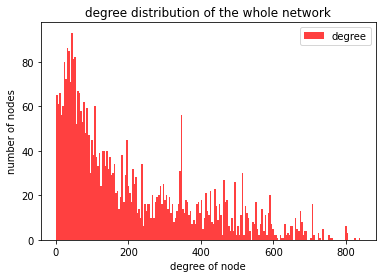

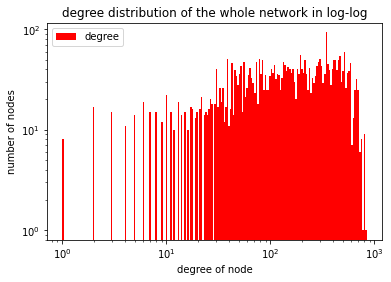

In [ ]:
#degree_sequence = sorted([d for n, d in GN.degree()], reverse=True) #order the degree values
degree_sequence = [d for n, d in GN.degree()]
_, bins_lin,_= plt.hist(degree_sequence, 200, density=False, facecolor='r', label="degree", alpha=0.75)
plt.title("degree distribution of the whole network")
plt.xlabel("degree of node")
plt.ylabel("number of nodes")
plt.legend() 
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/degree_distr_linear.png", transparent=True)
plt.show()


plt.hist(degree_sequence, bins=np.logspace(np.log10(bins_lin[0]),np.log10(bins_lin[-1]),len(bins_lin)), label="degree", color="red") #plot the in-degree distribution
plt.title("degree distribution of the whole network in log-log")
plt.xlabel("degree of node")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("number of nodes")
plt.legend()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/degree_distr_log.png", transparent=True)

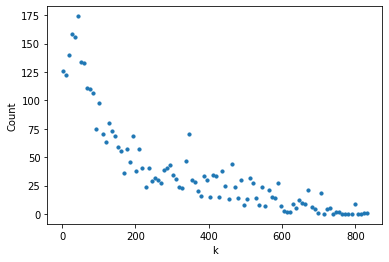

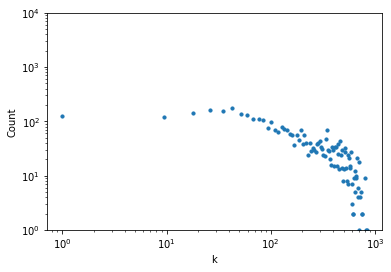

In [ ]:
hist, bin_edges = np.histogram(degree_sequence, bins=100)

plt.scatter(bin_edges[:-1], hist, s = 10)
plt.ylabel('Count')
plt.xlabel('k')
plt.show()
# log
plt.scatter(bin_edges[:-1], hist, s = 10)
plt.ylabel('Count')
plt.xlabel('k')
plt.yscale("log")
plt.xscale("log")
plt.ylim(1,10000)

plt.show()

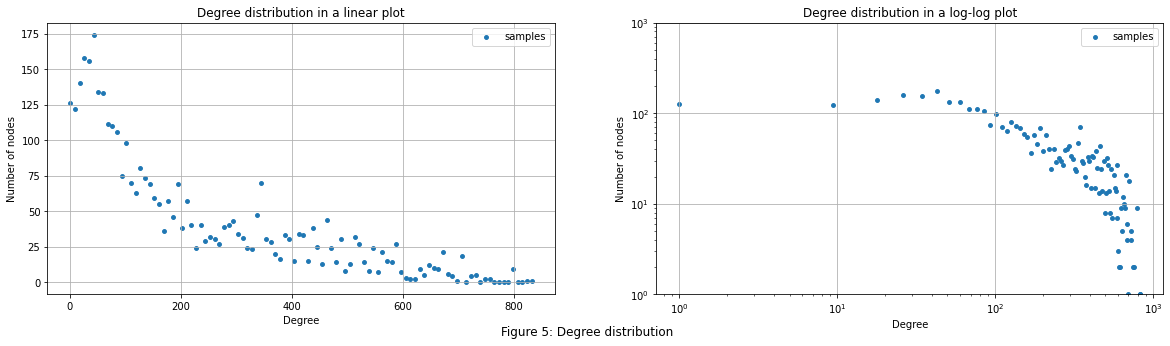

In [ ]:
degree_sequence = [d for n, d in GN.degree()]

hist, bin_edges = np.histogram(degree_sequence, bins=100)

f, axarr = plt.subplots(1, 2, figsize=(20, 5))

ax_flat = axarr.flatten()

ax_flat[0].scatter(bin_edges[:-1], hist, s = 15, label = "samples")
ax_flat[0].set_title("Degree distribution in a linear plot")
ax_flat[0].set_xlabel("Degree")
ax_flat[0].set_ylabel("Number of nodes")
ax_flat[0].grid()
ax_flat[0].legend()

ax_flat[1].scatter(bin_edges[:-1], hist, s = 15, label = "samples")
ax_flat[1].set_title("Degree distribution in a log-log plot")
ax_flat[1].set_xlabel("Degree")
ax_flat[1].set_ylabel("Number of nodes")
ax_flat[1].grid()
ax_flat[1].set_yscale("log")
ax_flat[1].set_xscale("log")
ax_flat[1].set_ylim(1,1000)
ax_flat[1].legend()

_=plt.figtext(0.5, 0.01, "Figure 5: Degree distribution", wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/degree_distr.png", transparent=True)

In [ ]:
average_degree=np.mean(degree_sequence)
print(average_degree)
print(np.log(N))

283.4010582010582
8.237479288613633


scale-free alpha

In [ ]:
degree = [d for n, d in GN.degree()]
g_deg = powerlaw.Fit(degree, verbose = False).power_law.alpha
print("Gamma of degree: ", g_deg)

Gamma of degree:  6.864809059998023


assortativity

In [ ]:
assort_degree = nx.degree_assortativity_coefficient(GN)
print("Assortativity degree: ", assort_degree)

assort_descr = nx.attribute_assortativity_coefficient(GN, ','.join("tags"))
print("Assortativity degree by descriptions: ", assort_descr)


Assortativity degree:  0.10539961226200742
Assortativity degree by tags:  -0.0003853598434068242


In [ ]:
with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/dict_total_sentiment.p', 'rb') as fp:
    dict_sentiment = pickle.load(fp)

attr_sent = { k : { "sentiment" : '%.2f'%(v) } for k,v in dict_sentiment.items()}
nx.set_node_attributes(GN, attr_sent)

In [ ]:
assort_sentiment = nx.attribute_assortativity_coefficient(GN, "sentiment")
print("Assortativity degree by sentiment: ", assort_sentiment)

Assortativity degree by sentiment:  0.0050606085143076705


# Basic visualisation

In [ ]:
node_size_map = []  #structure to save the list of the sizes for the nodes

for node in GN:  #for each node of the network...
    node_size_map.append(GN.degree(node)/8)   #set the size proportionally to its degree

In [ ]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0.2,

                        # Performance
                        jitterTolerance=0.2,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.6,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=3.0,
                        strongGravityMode=True,
                        gravity=1.5,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(GN, pos=None, iterations=1000)  #prepare the visualisation: set the positions of the nodes

100%|██████████| 1000/1000 [02:31<00:00,  6.60it/s]

BarnesHut Approximation  took  27.93  seconds
Repulsion forces  took  92.66  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  26.93  seconds
AdjustSpeedAndApplyForces step  took  1.05  seconds


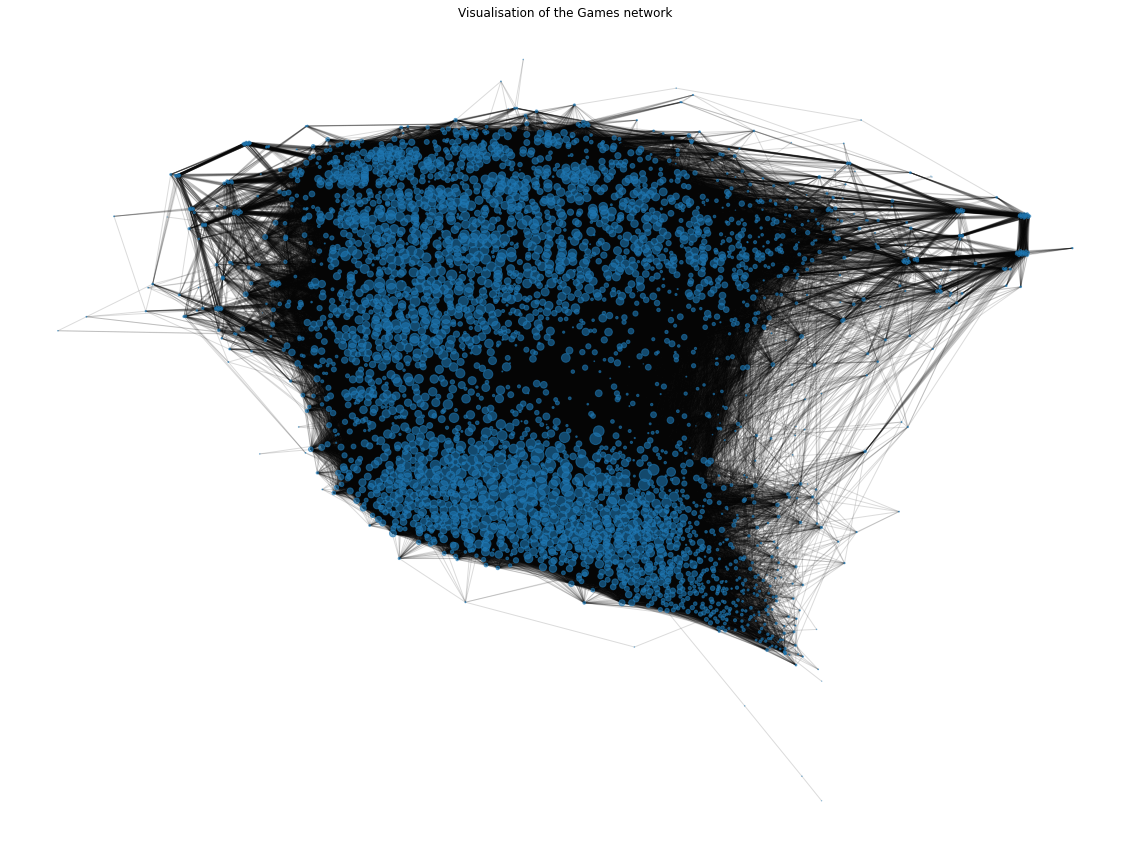

In [ ]:
plt.figure(figsize=(20,15))  #set the figure
plt.title("Visualisation of the Games network")
#plt.xlim(-3000, 3000)
#plt.ylim(-3000, 3000)
plt.axis('off')
nx.draw_networkx_nodes(GN, positions, node_size=node_size_map, alpha=0.6)#, node_color=color_map)
nx.draw_networkx_edges(GN, positions, alpha=0.14)#, edge_color=edge_map)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/network.png", transparent=True)
plt.show()

# Communities and visualisation of them

In [ ]:
#Louvain method
partition = cmg.best_partition(GN, random_state= 10) #random state in order to obtain always the same result
#The optimal modularity reached with the Louvain method
M = cmg.modularity(partition, GN)
print("Optimal Modularity: ", M)

Optimal Modularity:  0.4562183667745229


Number of communities found: 6


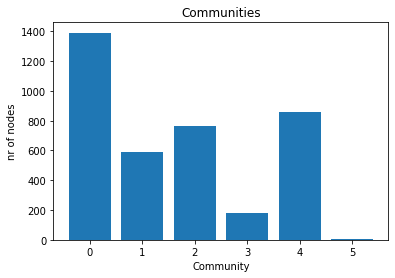

In [ ]:
#Get a dictonary of which character(node) belongs to which community
data = partition.values()
# creating a list with the keys 
items = Counter(data).keys() 
print("Number of communities found:", len(items))
#count the number of characters within each community
c = collections.Counter(data)
c = sorted(c.items())
#Get nr of community
nr = [i[0] for i in c]
#Get nr of characters in each community
freq = [i[1] for i in c]

#Plot the distribution, setting all the plt properties
f, ax = plt.subplots()
plt.bar(nr, freq)
plt.title("Communities")
plt.xlabel("Community")
plt.ylabel("nr of nodes")
ax.set_xticks(range(0, len(items)))
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/communities_distribution.png", transparent=True)
plt.show()

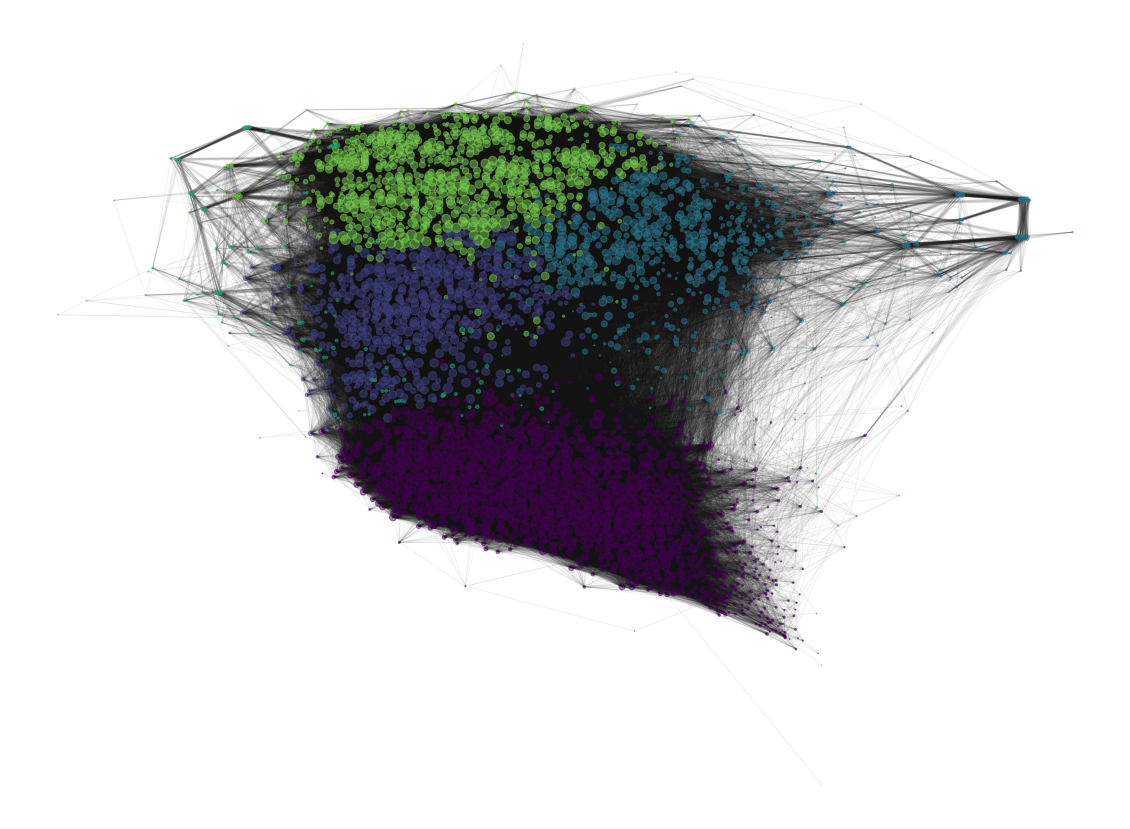

In [ ]:
color_map = []  #structure to save the list of the colors for the nodes
edge_map = []  #structure to save the list of the colors for the nodes

plt.figure(figsize=(20,15))  #set the figure
color_map = list(partition.values())
for link in GN.edges():
  edge_map.append(partition[link[0]]*partition[link[1]]+partition[link[0]]+6)
#color_legend={"0":color_map[0],"1":color_map[1],"2":color_map[2],"3":color_map[3],"4":color_map[4],"5":color_map[5]}
nx.draw_networkx_nodes(GN, positions, node_size = node_size_map, node_color=color_map, alpha=0.5)
nx.draw_networkx_edges(GN, positions, alpha=0.05)#, edge_color=edge_map)

#plt.xlim(-3000, 3000)
#plt.ylim(-3000, 3000)
plt.axis('off')
#for label in color_legend:
#  plt.plot([0],[0],color=matplotlib.colors.to_rgba(color_legend[label]), label=label)
#plt.legend()
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/communities_graph.png", transparent=True)
plt.show()

In [ ]:
print(GN.nodes())

['730', '570', '578080', '945360', '271590', '1172470', '252950', '440', '359550', '346110', '230410', '1100600', '1085660', '381210', '252490', '582010', '739630', '105600', '289070', '236390', '227300', '4000', '238960', '251570', '394360', '444200', '218620', '1145360', '304930', '221100', '550', '594570', '292030', '291550', '787860', '255710', '306130', '322330', '1174180', '50100', '8930', '377160', '582660', '281990', '236850', '1097150', '294100', '10', '1089350', '107410', '1158310', '489830', '813780', '435150', '427520', '413150', '242760', '386360', '261550', '39210', '444090', '1049590', '440900', '1259970', '761890', '438100', '814380', '812140', '239140', '648800', '601510', '275850', '594650', '996470', '552990', '1343400', '526870', '1222670', '359320', '374320', '1151340', '250900', '231430', '872790', '1172620', '779340', '1225330', '1147690', '322170', '646570', '1258080', '214950', '72850', '457140', '219990', '1080110', '1286830', '1046930', '905370', '552520', '2

In [ ]:
print(communities_by_value[0])

['730', '570', '578080', '945360', '1172470', '252950', '440', '359550', '346110', '230410', '1085660', '381210', '252490', '582010', '739630', '105600', '289070', '236390', '227300', '4000', '238960', '251570', '394360', '444200', '218620', '304930', '221100', '550', '594570', '291550', '787860', '306130', '322330', '1174180', '582660', '1097150', '10', '1089350', '107410', '1158310', '813780', '435150', '427520', '413150', '242760', '261550', '39210', '444090', '1049590', '440900', '1259970', '761890', '438100', '239140', '648800', '601510', '275850', '594650', '996470', '552990', '1343400', '526870', '359320', '374320', '1151340', '250900', '231430', '1172620', '779340', '1225330', '646570', '1258080', '214950', '219990', '1080110', '1286830', '1046930', '905370', '552520', '244850', '221380', '1086940', '397540', '548430', '933110', '393380', '8500', '714010', '632360', '1056640', '774861', '244210', '766570', '513710', '552500', '291480', '1041320', '700330', '232090', '477160', '

In [ ]:
print([GN.nodes()[name]["name"] for name, comm in partition.items() if comm == 5])
#print(list(partition.keys())[list(partition.values()).index(0)])  # Prints the name of the games in the last partition (that has only 3 elements!)

['GameMaker Studio 2 Desktop', 'GameGuru', 'AppGameKit Classic: Easy Game Development']


In [ ]:
print(partition)

{'730': 0, '570': 0, '578080': 0, '945360': 0, '271590': 1, '1172470': 0, '252950': 0, '440': 0, '359550': 0, '346110': 0, '230410': 0, '1100600': 2, '1085660': 0, '381210': 0, '252490': 0, '582010': 0, '739630': 0, '105600': 0, '289070': 0, '236390': 0, '227300': 0, '4000': 0, '238960': 0, '251570': 0, '394360': 0, '444200': 0, '218620': 0, '1145360': 1, '304930': 0, '221100': 0, '550': 0, '594570': 0, '292030': 1, '291550': 0, '787860': 0, '255710': 2, '306130': 0, '322330': 0, '1174180': 0, '50100': 2, '8930': 2, '377160': 1, '582660': 0, '281990': 2, '236850': 2, '1097150': 0, '294100': 2, '10': 0, '1089350': 0, '107410': 0, '1158310': 0, '489830': 1, '813780': 0, '435150': 0, '427520': 0, '413150': 0, '242760': 0, '386360': 3, '261550': 0, '39210': 0, '444090': 0, '1049590': 0, '440900': 0, '1259970': 0, '761890': 0, '438100': 0, '814380': 1, '812140': 1, '239140': 0, '648800': 0, '601510': 0, '275850': 0, '594650': 0, '996470': 0, '552990': 0, '1343400': 0, '526870': 0, '1222670'

In [ ]:
communities_by_value={}
for key in partition:
  if partition[key] in communities_by_value:
    communities_by_value[partition[key]].append(key)
  else:
    communities_by_value[partition[key]]=key

In [ ]:
names={0:[],1:[],2:[],3:[],4:[],5:[]}
for i in range(6):
  tags_for_comm = ["a"]
  taags=nx.get_node_attributes(GN, "tags")
  count = 0
  for game in GN.nodes():
    if partition[game]==i:
      count+=1
      tags_for_comm.extend(taags[game])
  words_to_count = (word for word in tags_for_comm)# if word not in ["Steam Cloud","Steam Achievements","Steam Trading Cards","Single-player"])
  c = Counter(words_to_count)
  print(i)
  print(count)
  print(c.most_common(4))
  names[i]=[value[0] for value in c.most_common(4)]

0
1391
[('Multi-player', 1371), ('Single-player', 1056), ('PvP', 867), ('Action', 860)]
1
589
[('Single-player', 588), ('Full controller support', 460), ('Action', 348), ('Adventure', 321)]
2
763
[('Single-player', 752), ('Strategy', 529), ('Indie', 466), ('Simulation', 373)]
3
177
[('Single-player', 156), ('Action', 140), ('Multi-player', 108), ('Partial Controller Support', 63)]
4
857
[('Single-player', 850), ('Indie', 760), ('Adventure', 476), ('Action', 441)]
5
3
[('Animation & Modeling', 3), ('Design & Illustration', 3), ('Education', 3), ('Software Training', 3)]


['Multi-player', 'Single-player', 'PvP', 'Action']


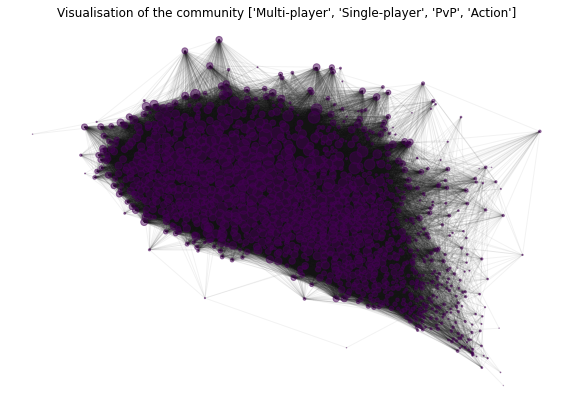

['Single-player', 'Full controller support', 'Action', 'Adventure']


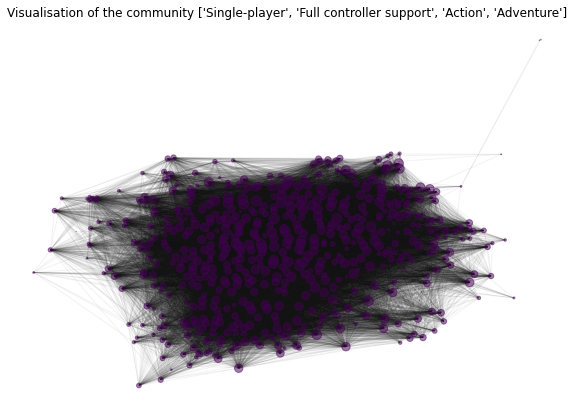

['Single-player', 'Strategy', 'Indie', 'Simulation']


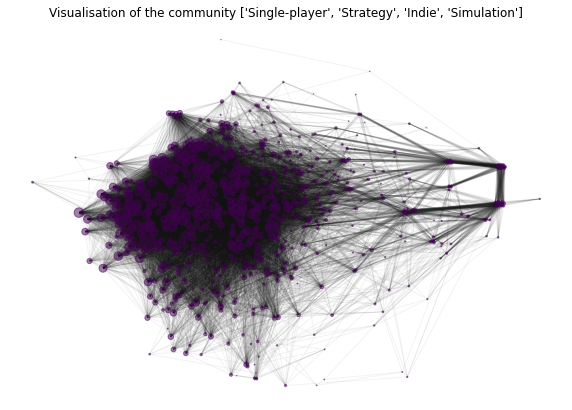

['Single-player', 'Action', 'Multi-player', 'Partial Controller Support']


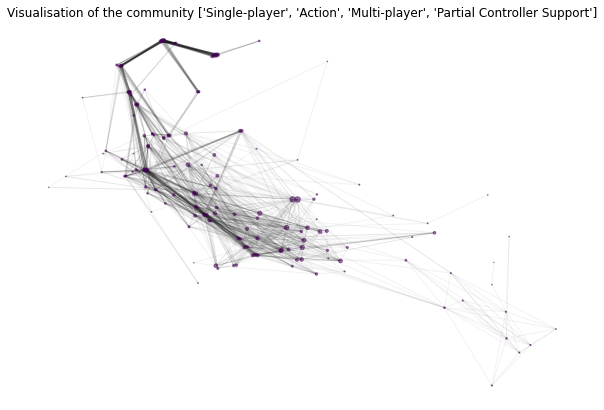

['Single-player', 'Indie', 'Adventure', 'Action']


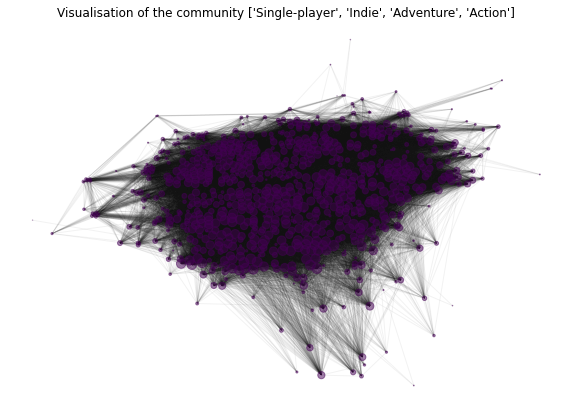

['Animation & Modeling', 'Design & Illustration', 'Education', 'Software Training']


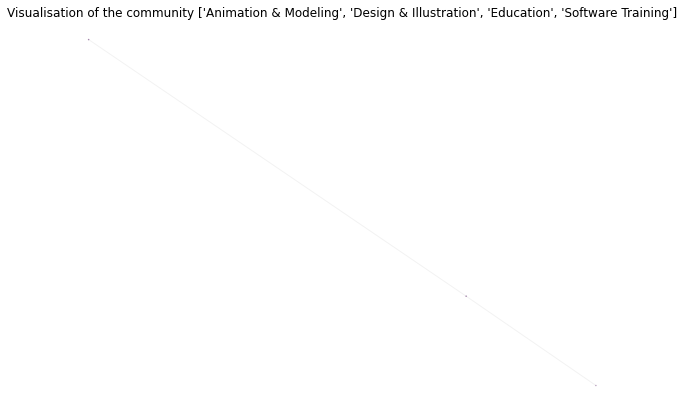

In [ ]:
for i in communities_by_value:
  print(names[i])
  plt.figure(figsize=(10,7)) 
  k = GN.subgraph(communities_by_value[i])
  nx.draw_networkx_nodes(k, positions, node_size = [GN.degree(node)/8 for node in k.nodes()], node_color=[ partition[node] for node in k.nodes()], alpha=0.5) #
  nx.draw_networkx_edges(k, positions, alpha=0.05)#, edge_color=edge_map)
  plt.axis('off')
  plt.title("Visualisation of the community "+str(names[i]))
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/"+str(i)+"_community_graph.png", transparent=True)
  plt.show()

#Correlation between the number of tags and the number f links

In [ ]:
degree=dict(GN.degree())
num_of_tags=nx.get_node_attributes(GN,"tags")
for id in num_of_tags:
  num_of_tags[id] = len(num_of_tags[id])

In [ ]:
print(degree)
print(num_of_tags)

{'730': 108, '570': 2, '578080': 7, '945360': 36, '271590': 217, '1172470': 331, '252950': 1073, '440': 89, '359550': 268, '346110': 477, '230410': 37, '1100600': 32, '1085660': 535, '381210': 452, '252490': 614, '582010': 254, '739630': 160, '105600': 1039, '289070': 292, '236390': 140, '227300': 176, '4000': 591, '238960': 657, '251570': 756, '394360': 179, '444200': 233, '218620': 525, '1145360': 239, '304930': 979, '221100': 7, '550': 833, '594570': 394, '292030': 279, '291550': 873, '787860': 259, '255710': 123, '306130': 6, '322330': 207, '1174180': 376, '50100': 138, '8930': 138, '377160': 169, '582660': 365, '281990': 171, '236850': 171, '1097150': 423, '294100': 69, '10': 2, '1089350': 600, '107410': 573, '1158310': 270, '489830': 67, '813780': 112, '435150': 949, '427520': 261, '413150': 446, '242760': 135, '386360': 13, '261550': 28, '39210': 144, '444090': 116, '1049590': 42, '440900': 871, '1259970': 140, '761890': 123, '438100': 249, '814380': 483, '812140': 75, '239140':

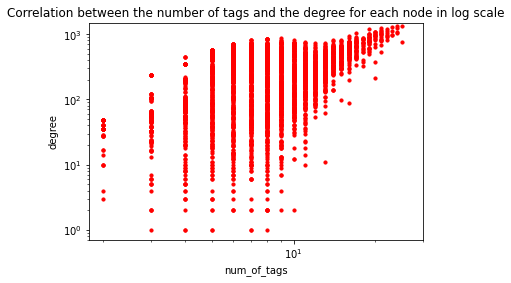

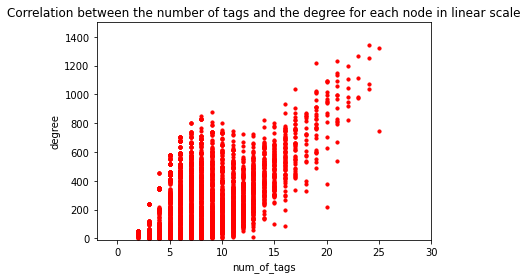

In [ ]:
plt.yscale("log")
plt.xscale("log")
plt.scatter(num_of_tags.values(), degree.values(), color="red", s=10)
plt.ylabel("degree")
plt.xlabel("num_of_tags")
plt.title("Correlation between the number of tags and the degree for each node in log scale")
plt.ylim(-10,1500)
plt.xlim(-10,30)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/tag_degree_correl_log.png", transparent=True)
plt.show()

plt.scatter(num_of_tags.values(), degree.values(), color="red", s=10)
plt.ylabel("degree")
plt.xlabel("num_of_tags")
plt.title("Correlation between the number of tags and the degree for each node in linear scale")
plt.ylim(-10,1500)
plt.xlim(-2,30)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/tag_degree_correl_lin.png", transparent=True)
plt.show()

# Analysis of the tags for each community

In [ ]:
for comm in communities_by_value:
  aver_degree=0
  for id in communities_by_value[comm]:
    aver_degree+=degree[id]
  aver_degree/=len(communities_by_value[comm])
  print(aver_degree)

300.9489575844716
360.28013582342953
199.97903014416775
47.33898305084746
326.09451575262545
1.6666666666666667


In [ ]:
intercorrelations = np.zeros((len(communities_by_value),len(communities_by_value)), dtype=int)
for link in GN.edges():
  intercorrelations[partition[link[0]]][partition[link[1]]]+=1


percentage of links between community i and j

In [ ]:
print((intercorrelations/sum(sum(intercorrelations))*100).round(decimals=1))
print(sum(sum(intercorrelations)))

[[35.   3.2  0.9  0.2  0.5  0. ]
 [ 2.5 11.4  2.2  0.1  5.   0. ]
 [ 0.6  1.8  8.1  0.   4.2  0. ]
 [ 0.1  0.1  0.   0.4  0.2  0. ]
 [ 0.2  2.   2.5  0.1 18.8  0. ]
 [ 0.   0.   0.   0.   0.   0. ]]
535628


In [ ]:
names={0:[],1:[],2:[],3:[],4:[],5:[]}
for i in range(6):
  tags_for_comm = ["a"]
  taags=nx.get_node_attributes(GN, "tags")
  count = 0
  for game in GN.nodes():
    if partition[game]==i:
      count+=1
      tags_for_comm.extend(taags[game])
  words_to_count = (word for word in tags_for_comm if word not in ["Steam Cloud","Steam Achievements","Steam Trading Cards"])
  c = Counter(words_to_count)
  print(i)
  print(count)
  print(c.most_common(4))
  names[i]=[value[0] for value in c.most_common(4)]

0
1391
[('Multi-player', 1371), ('Single-player', 1056), ('PvP', 867), ('Action', 860)]
1
589
[('Single-player', 588), ('Full controller support', 460), ('Action', 348), ('Adventure', 321)]
2
763
[('Single-player', 752), ('Strategy', 529), ('Indie', 466), ('Simulation', 373)]
3
177
[('Single-player', 156), ('Action', 140), ('Multi-player', 108), ('Partial Controller Support', 63)]
4
857
[('Single-player', 850), ('Indie', 760), ('Adventure', 476), ('Action', 441)]
5
3
[('Animation & Modeling', 3), ('Design & Illustration', 3), ('Education', 3), ('Software Training', 3)]


In [ ]:
print(names)

{0: ['Multi-player', 'Single-player', 'PvP', 'Action'], 1: ['Single-player', 'Full controller support', 'Action', 'Adventure'], 2: ['Single-player', 'Strategy', 'Indie', 'Simulation'], 3: ['Single-player', 'Action', 'Multi-player', 'Partial Controller Support'], 4: ['Single-player', 'Indie', 'Adventure', 'Action'], 5: ['Animation & Modeling', 'Design & Illustration', 'Education', 'Software Training']}


aver total:  2.476961795273518
0
aver  0 : 1.9466994915929225


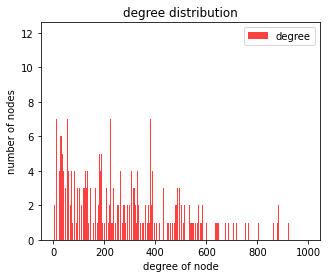

1
aver  1 : 1.719055703775568


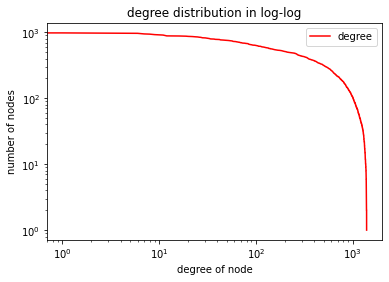

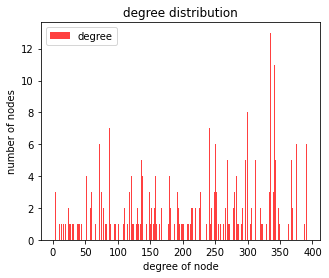

2
aver  2 : 2.342703721667819


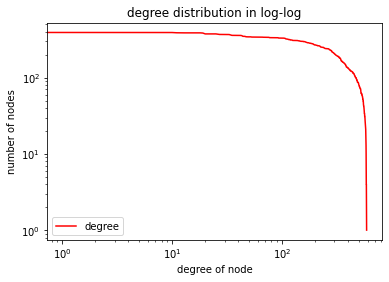

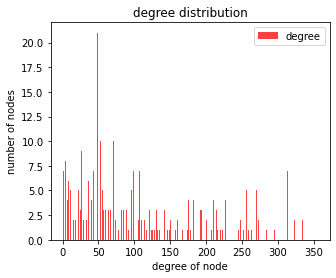

3
aver  3 : 2.832306111967129


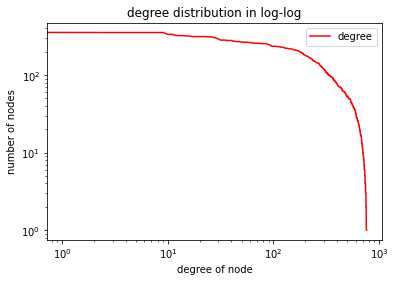

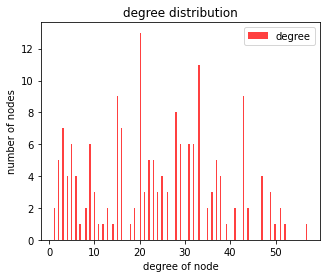

4
aver  4 : 1.8493713126642601


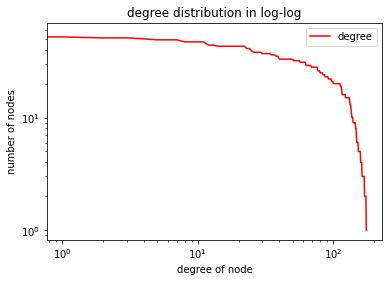

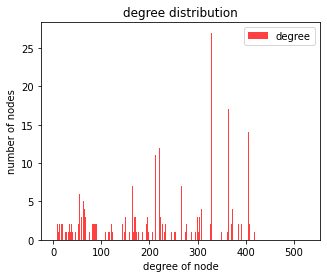

5
aver  5 : 1.3333333333333333


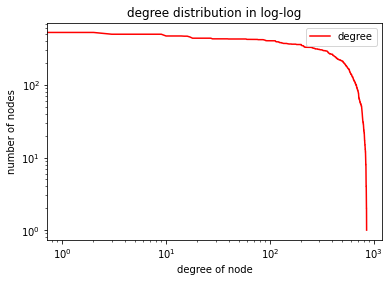

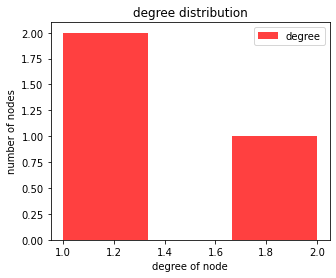

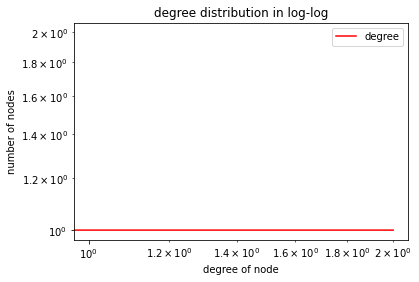

In [ ]:
d1 = nx.average_shortest_path_length(GN)
print("aver total: ",d1)
for i in communities_by_value:
  print(i)
  plt.figure(figsize=(5,4)) 
  k = GN.subgraph(communities_by_value[i])
  d1 = nx.average_shortest_path_length(k)
  print("aver ",i,":",d1)
  degree_sequence = sorted([d for n, d in k.degree()], reverse=True) #order the degree values
  plt.hist(degree_sequence, len(degree_sequence), density=False, facecolor='r', label="degree", alpha=0.75)
  plt.title("degree distribution")
  plt.xlabel("degree of node")
  plt.ylabel("number of nodes")
  plt.legend() 
  plt.show()
  plt.loglog(degree_sequence, label="degree", color="red") #plot the in-degree distribution
  plt.title("degree distribution in log-log")
  plt.xlabel("degree of node")
  plt.ylabel("number of nodes")
  plt.legend() 

0


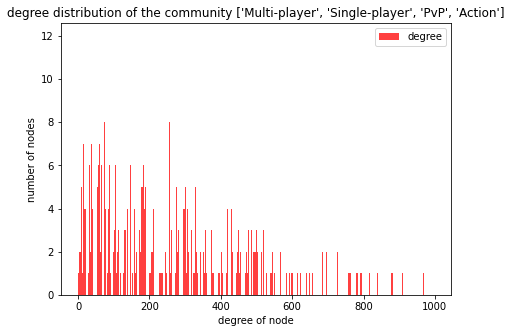

1


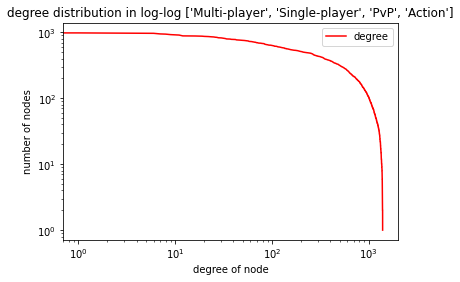

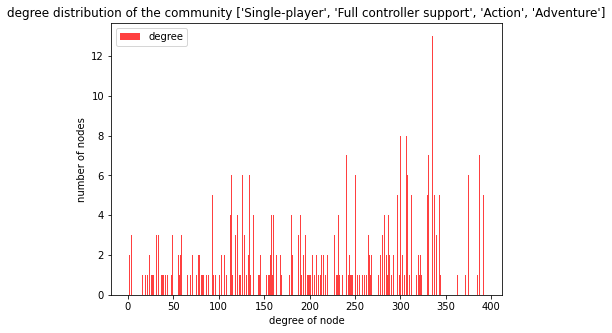

2


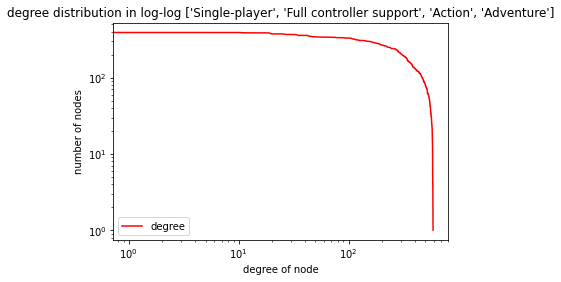

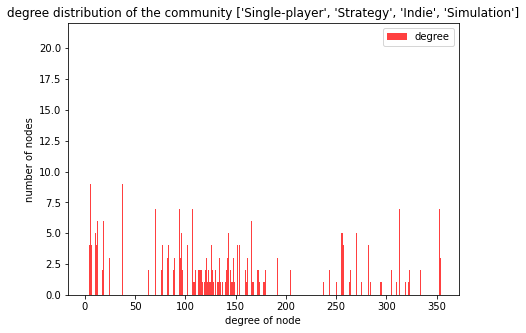

3


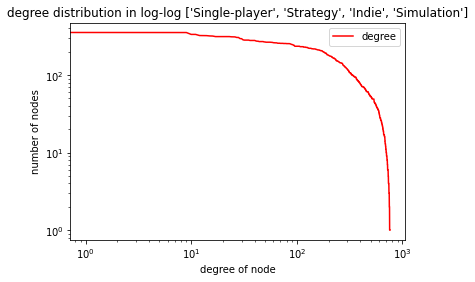

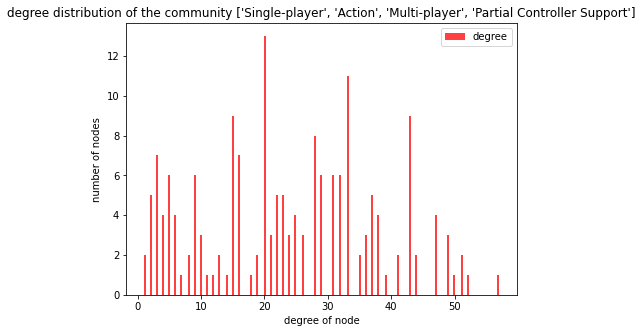

4


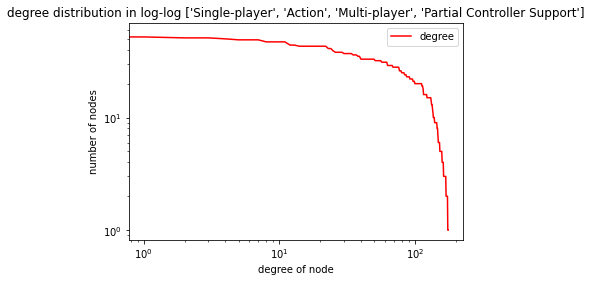

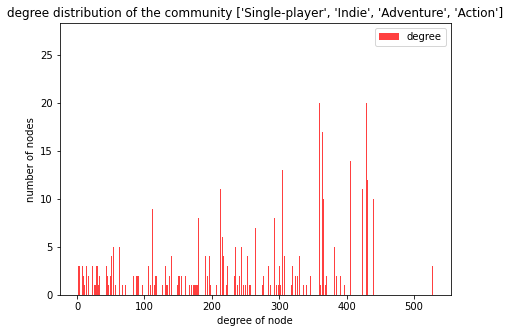

5


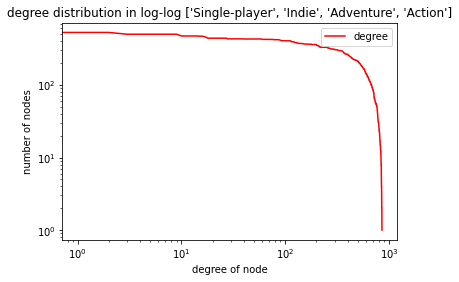

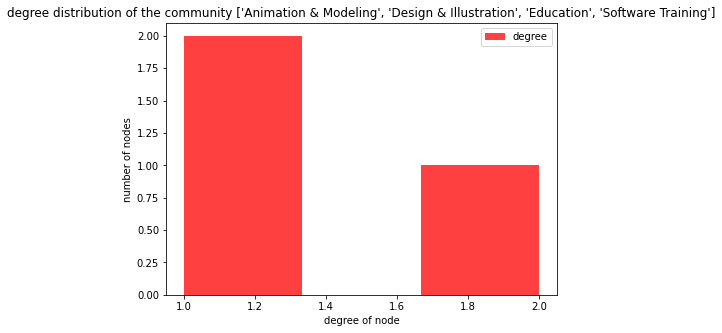

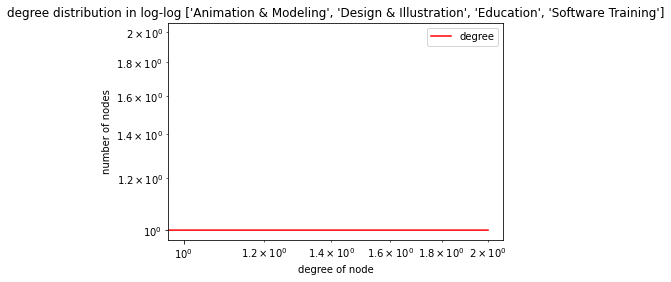

In [ ]:
for i in communities_by_value:
  print(i)
  plt.figure(figsize=(7,5)) 
  k = GN.subgraph(communities_by_value[i])
  degree_sequence = sorted([d for n, d in k.degree()], reverse=True) #order the degree values
  plt.hist(degree_sequence, len(degree_sequence), density=False, facecolor='r', label="degree", alpha=0.75)
  plt.title("degree distribution of the community "+str(names[i]))
  plt.xlabel("degree of node")
  plt.ylabel("number of nodes")
  plt.legend()
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/"+str(i)+"_community_degree_lin.png", transparent=True) 
  plt.show()
  plt.loglog(degree_sequence, label="degree", color="red") #plot the in-degree distribution
  plt.title("degree distribution in log-log "+str(names[i]))
  plt.xlabel("degree of node")
  plt.ylabel("number of nodes")
  plt.legend()
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/"+str(i)+"_community_degree_log.png", transparent=True)

In [ ]:
d1 = nx.average_shortest_path_length(GN)
degree_sequence = sorted([d for n, d in GN.degree()], reverse=True) #order the degree values
print("experimentally: ",d1)
print("mathematically: ",np.log(N)/np.log(np.mean(degree_sequence)))

for i in communities_by_value:
  print(i)
  sub = GN.subgraph(communities_by_value[i])
  degree_sequence_comm = sorted([d for n, d in sub.degree()], reverse=True) #order the degree values
  N = len(sub)
  L = sub.size()
  d1 = nx.average_shortest_path_length(sub)
  print("experimentally: ",d1)
  print("mathematically: ",np.log(N)/np.log(np.mean(degree_sequence_comm)))

experimentally:  2.476961795273518
mathematically:  1.4587708608017125
0
experimentally:  1.9466994915929225
mathematically:  1.2935061085908341
1
experimentally:  1.719055703775568
mathematically:  1.196651092989012
2
experimentally:  2.342703721667819
mathematically:  1.4005270940249306
3
experimentally:  2.832306111967129
mathematically:  1.6321130564617374
4
experimentally:  1.8493713126642601
mathematically:  1.2368602177306713
5
experimentally:  1.3333333333333333
mathematically:  3.8188416793064195


In [ ]:
d1 = nx.average_clustering(GN)
degree_sequence = sorted([d for n, d in GN.degree()], reverse=True) #order the degree values
print("experimentally: ",d1)
print("mathematically: ",np.mean(degree_sequence)/N)

for i in communities_by_value:
  print(i)
  sub = GN.subgraph(communities_by_value[i])
  degree_sequence_comm = sorted([d for n, d in sub.degree()], reverse=True) #order the degree values
  N = len(sub)
  L = sub.size()
  d1 = nx.average_shortest_path_length(sub)
  print("experimentally: ",d1)
  print("mathematically: ",np.mean(degree_sequence_comm)/N)

experimentally:  0.5313632081970298
mathematically:  0.07497382492091487
0
experimentally:  1.9466994915929225
mathematically:  0.19353334907934905
1
experimentally:  1.719055703775568
mathematically:  0.35056972624891547
2
experimentally:  2.342703721667819
mathematically:  0.14984652222979924
3
experimentally:  2.832306111967129
mathematically:  0.13469947971527976
4
experimentally:  1.8493713126642601
mathematically:  0.2743662255650154
5
experimentally:  1.3333333333333333
mathematically:  0.4444444444444444


In [ ]:
for i in communities_by_value:
  print(i)
  sub = GN.subgraph(communities_by_value[i])
  json_GN = json_graph.node_link_data(sub)
  with open ('/content/drive/MyDrive/Colab Notebooks/SG/final project/dataForTheSite/'+str(i)+'_json_community.txt', 'w') as fp:
    json.dump(json_GN, fp)

0
1
2
3
4
5
